In [13]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)
print(type(X), X.shape, type(y), y.shape)
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])
# print(shap_values.shape)

<class 'pandas.core.frame.DataFrame'> (20640, 8) <class 'numpy.ndarray'> (20640,)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fairlearn.datasets import fetch_adult

In [18]:
data = fetch_adult(as_frame=True)
X = pd.get_dummies(data.data) # one-hot 编码
y = (data.target == '>50K') * 1 # 将 False 变为 0 ，将 True 变为 1
sex = data.data['sex']
sex.value_counts()
X = X.replace({False:0, True:1})
print(type(X), X.shape, type(y), y.shape)

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


<class 'pandas.core.frame.DataFrame'> (48842, 105) <class 'pandas.core.series.Series'> (48842,)


In [20]:
X.shape, y.shape

((48842, 105), (48842,))

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
dtc.fit(X, y)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [22]:
import shap
explainer = shap.Explainer(dtc)
shap_values = explainer(X.values)
shap_values.shape

(48842, 105, 2)

<class 'pandas.core.frame.DataFrame'> (48842, 105) <class 'pandas.core.series.Series'> (48842,)


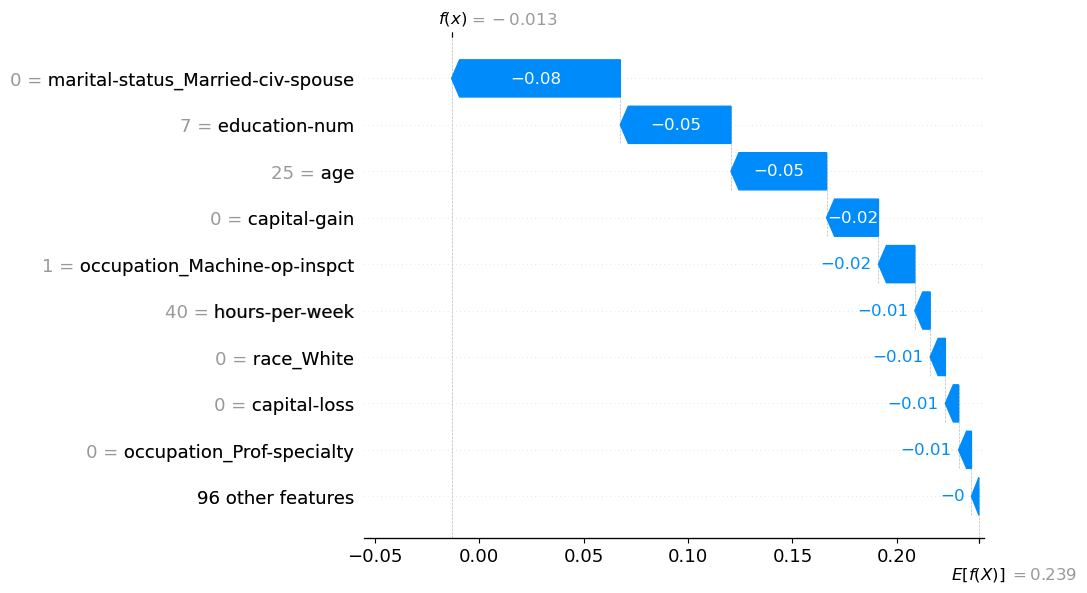

In [24]:
import xgboost
import shap

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)
print(type(X), X.shape, type(y), y.shape)
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])
# print(shap_values.shape)

In [19]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [27]:
shap_values[0]

.values =
array([-4.5771278e-02,  5.9438786e-03, -5.2980106e-02, -2.4839800e-02,
       -6.3362559e-03, -7.3541710e-03, -1.2337907e-03, -6.2168558e-04,
        0.0000000e+00,  3.1490729e-03, -1.0973494e-03, -1.0761466e-04,
        2.3686519e-04,  1.1378989e-05, -2.6064095e-05,  1.4831292e-03,
       -2.6238151e-05, -3.8896169e-06, -7.6744036e-06, -3.2177486e-05,
       -2.1616368e-06,  1.7324333e-04, -2.2258316e-04,  5.3334812e-04,
        0.0000000e+00, -4.7451045e-05,  3.6670882e-04,  0.0000000e+00,
        3.5332722e-04, -4.3402694e-04, -1.7224825e-06, -3.0859938e-04,
       -8.0772169e-02, -1.1102056e-04, -7.3440524e-04, -2.8837467e-06,
       -3.0343130e-04, -2.7382150e-04,  1.0173346e-07, -1.5266278e-05,
       -5.4334640e-03,  9.1403280e-04,  4.6313845e-04, -1.7406594e-02,
        1.2122947e-03,  1.8745981e-05, -6.1586034e-03, -7.4667687e-04,
       -1.6290353e-03, -1.1142739e-03,  4.9480365e-04, -6.1500969e-04,
       -9.2887704e-04,  2.4819345e-04, -1.0242405e-03, -1.1453914e-

In [38]:
# shap.plots.waterfall(shap_values[0])
X.columns.get_loc("sex_Female")

62

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


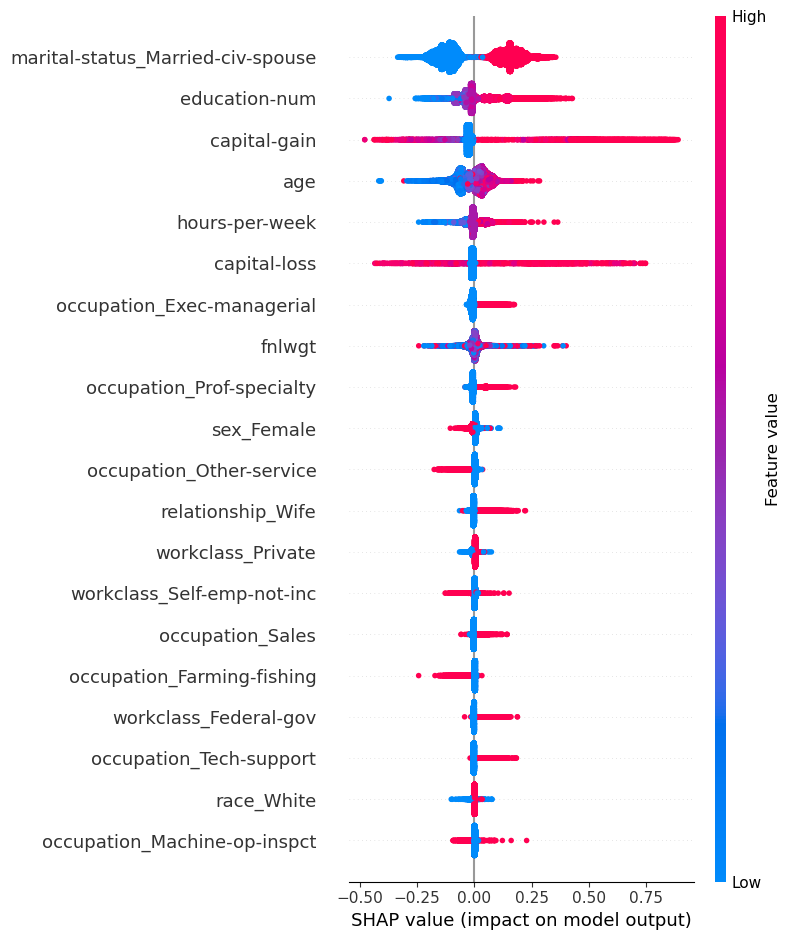

In [28]:
shap.summary_plot(shap_values, X)

In [40]:
import numpy as np

# 假设您已经计算出了shap_values，并存在shap_values变量中
# 假设X_test是测试数据集

# 找到具有最大特征值的样本的索引
max_feature_index = np.argmax(np.abs(shap_values[:, 62].values))

# 打印结果
print("具有最大特征值的样本索引：", max_feature_index)
print("对应的特征值：", shap_values[max_feature_index, 62])
print("对应的样本：", X.iloc[max_feature_index])

具有最大特征值的样本索引： 47461
对应的特征值： .values =
0.11222328

.base_values =
0.23925611

.data =
0
对应的样本： age                                  75
fnlwgt                            98116
education-num                        10
capital-gain                          0
capital-loss                          0
                                  ...  
native-country_Thailand               0
native-country_Trinadad&Tobago        0
native-country_United-States          1
native-country_Vietnam                0
native-country_Yugoslavia             0
Name: 47461, Length: 105, dtype: int64


In [53]:
arr = shap_values[:, 62].values # numpy.ndarray
sorted_indices = np.argsort(np.abs(arr))
k = 10
top_k_indices = sorted_indices[-k:]
top_k_indices

array([23328,  4021, 38576, 19485,  2290, 36317,  3686, 35931, 43883,
       47461])

In [62]:
from fairlearn.metrics import selection_rate
from fairlearn.metrics import MetricFrame
y_pred = model.predict(X)
sr = MetricFrame(metrics=selection_rate, y_true=y, y_pred=y_pred, sensitive_features=sex)
sr.overall
sr.by_group
print("sex")

sex


In [60]:
# 对这 k 个样本进行处理
X_ext = X.iloc[top_k_indices, :]
# 交换性别的值
sex_Female = X_ext["sex_Female"]



23328    1
4021     1
38576    1
19485    0
2290     0
36317    1
3686     0
35931    0
43883    0
47461    0
Name: sex_Female, dtype: int64